# News Classification
ASHWIN U IYER <br>
19BAI1118

In [1]:
import nltk #Importing NLP library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
messages = pd.read_csv("./data/train.csv")

In [4]:
messages.shape

(120000, 3)

<font size="5">***Exploratory Data Analysis*** <font>

In [5]:
messages.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [6]:
messages.describe()

,Class Index
count,120000.000000
mean,2.500000
std,1.118039
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


Observing the unique features of ham and spam seperately, which can be later used for Feature Engineering

In [7]:
messages.groupby('Class Index').describe()

Title                                                           \
             count unique                                          top freq   
Class Index                                                                   
1            30000  29004  A Look at U.S. Military Deaths in Iraq (AP)    8   
2            30000  29212                             Today's schedule   39   
3            30000  28569                        The Fool's Look Ahead    9   
4            30000  28163                           Enter your e-mail:   32   

            Description         \
                  count unique   
Class Index                      
1                 30000  29778   
2                 30000  29837   
3                 30000  29646   
4                 30000  29560   

                                                                     
                                                           top freq  
Class Index                                                          
1            ATHENS, Greece - Michael Phelps doesn't mind m...    4  
2                                                       #NAME?    7  
3            PacifiCare Health Systems Inc. (PHS.N: Quote, ...    3  
4            With the economy slowly turning up, upgrading ...   12

A useful feature would be Message Length so we shall engineer that

In [8]:
messages['length']=messages['Title'].apply(len)

In [9]:
messages.head()

,Class Index,Title,Description,length
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",49
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,51
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,47
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,60
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",73


In [10]:
%matplotlib inline

<AxesSubplot:xlabel='Class Index', ylabel='length'>

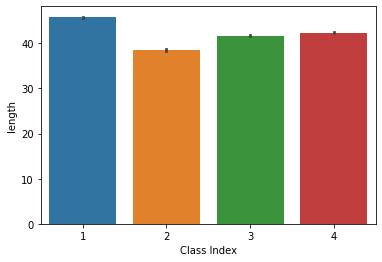

In [11]:
sns.barplot(x=messages['Class Index'],y=messages['length'])

<AxesSubplot:ylabel='Frequency'>

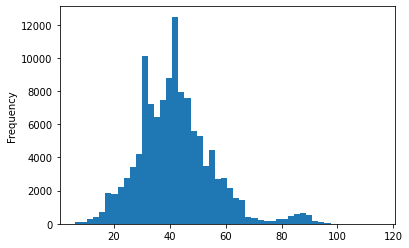

In [12]:
messages['length'].plot.hist(bins=50)

In [13]:
messages['length'].max()

115

In [14]:
print(messages[messages['length']==115]['Title'].iloc[0])

Attachmate Heightens Security, Centralises Management and Brings Microsoft Usability to Host Access with EXTRA! ...


array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>]], dtype=object)

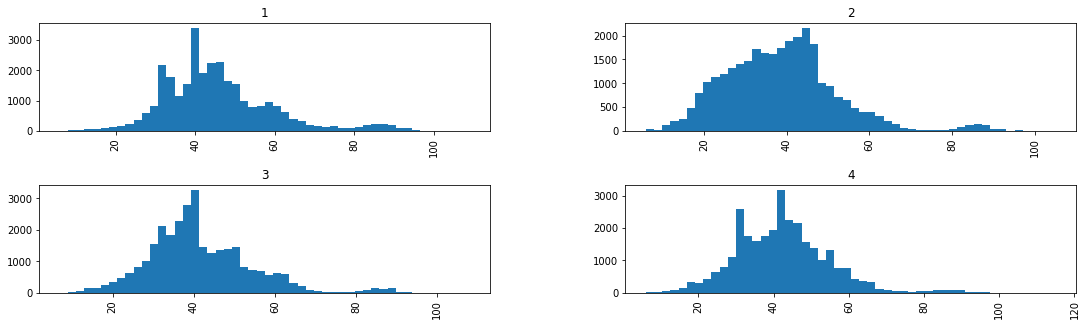

In [15]:
messages.hist(column='length',by='Class Index', figsize=(18,5),bins=50)

<font size='5'>***Text Preprocessing***<font>

In [16]:
#Importing the string library
import string

<font size='4'>**Stopword Removal**<font>

Stopwords are most commonly used words that don't add much meaning to the message. Listed below are the more commonly used ones

In [17]:
#Importing stopwordds
from nltk.corpus import stopwords

In [18]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

<font size='4'>**Tokenization**<font>

Tokenising means breaking down the message into words individually, making it easier to analyse and compute

In [19]:
def text_cleaner(mess):
    '''
    1.Remove Punctuations
    2.Remove stopwords
    '''
    nopunc=[char for char in mess if char not in string.punctuation]#Seperates to individual chars and removes puncs
    nopunc=''.join(nopunc)#Joins individual characters
    nopunc=nopunc.split()#splits string to a list of individual words
    return [word for word in nopunc if word.lower() not in stopwords.words('english') ]#return nopunc after removing stopwords

In [20]:
from wordcloud import WordCloud
long_string = ','.join(list(messages[messages['Class Index']==1]['Description'].values))
def create_word_cloud(string):
    '''
    Args:
    string(str): A string which can be a sentence, tweet document etc
    '''
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=5, contour_color='steelblue',width=450,height=300)
    wordcloud.generate(string)
    return wordcloud

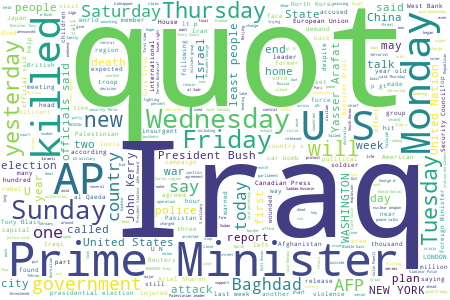

In [21]:
wordcloud=create_word_cloud(long_string)
wordcloud.to_image()

Class Index 1 corresponds to World News, which is reflected by the kind of topics being spoken about. To illustrate why Topic Modelling can be an effective tool, we can visualize another wordcloud, for sports

In [22]:
sports=create_word_cloud(','.join(list(messages[messages['Class Index']==2]['Description'].values)))

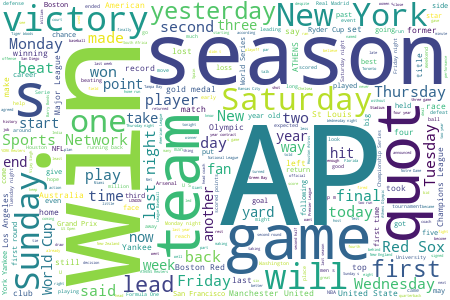

In [23]:
sports.to_image()

Hence, you can see why Topic Modelling can be effective as these topics can help very accurately classify articles which rely on content such as News, Books, Blogs etc.

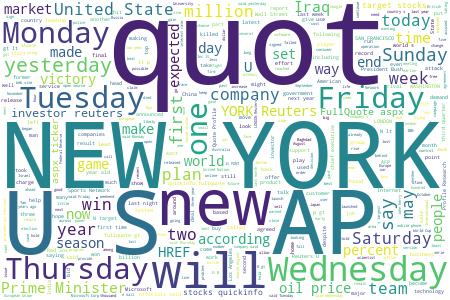

In [24]:
news=create_word_cloud(','.join(list(messages['Description'].values)))
news.to_image()

In [25]:
import gensim
from gensim.utils import simple_preprocess

In [26]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [27]:
import gensim.corpora as corpora

In [28]:
stop_words=stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = messages.Description.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['reuters', 'short', 'sellers', 'wall', 'street', 'dwindling', 'band', 'ultra', 'cynics', 'seeing', 'green']


In [29]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [30]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"said" + 0.007*"reuters" + 0.005*"ap" + 0.005*"new" + 0.005*"first" + '
  '0.004*"monday" + 0.004*"last" + 0.004*"wednesday" + 0.004*"government" + '
  '0.004*"iraq"'),
 (1,
  '0.009*"said" + 0.006*"new" + 0.006*"quot" + 0.005*"reuters" + 0.005*"one" + '
  '0.005*"world" + 0.005*"two" + 0.005*"ap" + 0.004*"us" + 0.004*"sunday"'),
 (2,
  '0.011*"new" + 0.007*"reuters" + 0.005*"two" + 0.005*"said" + '
  '0.004*"tuesday" + 0.004*"york" + 0.004*"ap" + 0.004*"people" + '
  '0.004*"president" + 0.004*"monday"'),
 (3,
  '0.008*"said" + 0.006*"two" + 0.006*"wednesday" + 0.005*"new" + '
  '0.005*"reuters" + 0.005*"minister" + 0.004*"ap" + 0.004*"prime" + '
  '0.004*"thursday" + 0.003*"president"'),
 (4,
  '0.007*"new" + 0.006*"space" + 0.005*"us" + 0.005*"world" + 0.005*"first" + '
  '0.005*"two" + 0.004*"said" + 0.004*"reuters" + 0.003*"quot" + '
  '0.003*"could"'),
 (5,
  '0.007*"two" + 0.005*"game" + 0.005*"said" + 0.005*"one" + 0.004*"year" + '
  '0.004*"ap" + 0.004*"first" + 